In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_df = pd.merge(clinical_df, mouse_df, on="Mouse ID")

# Display the data table for preview
clinical_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_clinical = clinical_df.set_index(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_clinical_table = pd.DataFrame(tumor_clinical["Tumor Volume (mm3)"])

# Preview DataFrame20
tumor_clinical_table.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   45.651331
          10                  43.270852
          15                  43.784893
          20                  42.731552

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_clinical_standerr = clinical_df.groupby(["Drug", "Timepoint"])

#Calculate mean and standard error
avg_tumor_vol = tumor_clinical_standerr["Tumor Volume (mm3)"].mean()
ste_tumor_vol = tumor_clinical_standerr["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_clinical_standerr_table = pd.DataFrame({"Avg Tumor Volume": avg_tumor_vol,
                             "Tumor Volume Std Error": ste_tumor_vol})                                            


# Preview DataFrame
tumor_clinical_standerr_table.head()                                  

Avg Tumor Volume  Tumor Volume Std Error
Drug      Timepoint                                          
Capomulin 0                 45.000000                0.000000
          5                 44.266086                0.448593
          10                43.084291                0.702684
          15                42.064317                0.838617
          20                40.716325                0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol = tumor_clinical_standerr_table.reset_index()
avg_tumor_vol_pivot = avg_tumor_vol.pivot(index="Timepoint", columns="Drug")["Avg Tumor Volume"]

ste_tumor_vol = tumor_clinical_standerr_table.reset_index()
ste_tumor_vol_pivot = ste_tumor_vol.pivot(index="Timepoint", columns="Drug")["Avg Tumor Volume"]

# Preview that Reformatting worked
avg_tumor_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


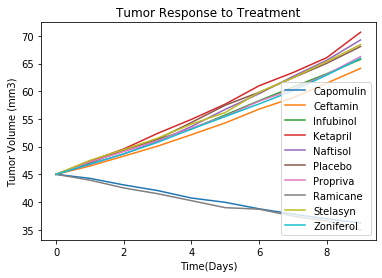

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(len(avg_tumor_vol_pivot))
Capomulin = avg_tumor_vol_pivot["Capomulin"]
Ceftamin = avg_tumor_vol_pivot["Ceftamin"]
Infubinol = avg_tumor_vol_pivot["Infubinol"] 
Ketapril = avg_tumor_vol_pivot["Ketapril"]
Naftisol = avg_tumor_vol_pivot["Naftisol"]
Placebo = avg_tumor_vol_pivot["Placebo"]
Propriva = avg_tumor_vol_pivot["Propriva"]
Ramicane = avg_tumor_vol_pivot["Ramicane"]
Stelasyn = avg_tumor_vol_pivot["Stelasyn"]
Zoniferol = avg_tumor_vol_pivot["Zoniferol"]

plt.plot(x_axis, Capomulin, label="Capomulin")
plt.plot(x_axis, Ceftamin, label="Ceftamin")
plt.plot(x_axis, Infubinol, label="Infubinol")
plt.plot(x_axis, Ketapril, label="Ketapril")
plt.plot(x_axis, Naftisol, label="Naftisol")
plt.plot(x_axis, Placebo, label="Placebo")
plt.plot(x_axis, Propriva, label="Propriva")
plt.plot(x_axis, Ramicane, label="Ramicane")
plt.plot(x_axis, Stelasyn, label="Stelasyn")
plt.plot(x_axis, Zoniferol, label="Zoniferol")


plt.legend(loc="best", fancybox=True)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

# Save the Figure
plt.savefig("Tumor_Chart.png")


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_clinical = clinical_df.set_index(["Drug", "Timepoint"])

# Convert to DataFrame
metastatic_clinical_table = pd.DataFrame(metastatic_clinical["Metastatic Sites"])

# Preview DataFrame
metastatic_clinical_table.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                         0
          5                         0
          10                        0
          15                        0
          20                        0

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_standerr = clinical_df.groupby(["Drug", "Timepoint"])

#Calculate mean and standard error
avg_metastatic_vol = metastatic_standerr["Metastatic Sites"].mean()
ste_metastatic_vol = metastatic_standerr["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_standerr_table = pd.DataFrame({"Avg Metastatic Sites Volume": avg_metastatic_vol,
                             "Metastatic Sites Std Error": ste_metastatic_vol})                                            


# Preview DataFrame
metastatic_standerr_table.head() 


Avg Metastatic Sites Volume  Metastatic Sites Std Error
Drug      Timepoint                                                         
Capomulin 0                             0.000000                    0.000000
          5                             0.160000                    0.074833
          10                            0.320000                    0.125433
          15                            0.375000                    0.132048
          20                            0.652174                    0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
avg_metastatic_vol = metastatic_standerr_table.reset_index()
avg_metastatic_vol_pivot = avg_metastatic_vol.pivot(index="Timepoint", columns="Drug")["Avg Metastatic Sites Volume"]

ste_metastatic_vol = metastatic_standerr_table.reset_index()
ste_metastatic_vol_pivot = ste_metastatic_vol.pivot(index="Timepoint", columns="Drug")["Avg Metastatic Sites Volume"]

# Preview that Reformatting worked
avg_metastatic_vol_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


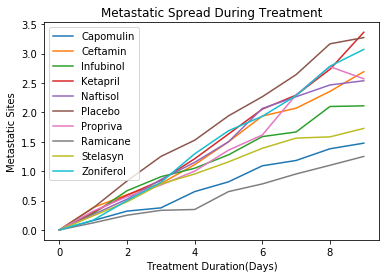

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(len(avg_metastatic_vol_pivot))
Capomulin = avg_metastatic_vol_pivot["Capomulin"]
Ceftamin = avg_metastatic_vol_pivot["Ceftamin"]
Infubinol = avg_metastatic_vol_pivot["Infubinol"] 
Ketapril = avg_metastatic_vol_pivot["Ketapril"]
Naftisol = avg_metastatic_vol_pivot["Naftisol"]
Placebo = avg_metastatic_vol_pivot["Placebo"]
Propriva = avg_metastatic_vol_pivot["Propriva"]
Ramicane = avg_metastatic_vol_pivot["Ramicane"]
Stelasyn = avg_metastatic_vol_pivot["Stelasyn"]
Zoniferol = avg_metastatic_vol_pivot["Zoniferol"]

plt.plot(x_axis, Capomulin, label="Capomulin")
plt.plot(x_axis, Ceftamin, label="Ceftamin")
plt.plot(x_axis, Infubinol, label="Infubinol")
plt.plot(x_axis, Ketapril, label="Ketapril")
plt.plot(x_axis, Naftisol, label="Naftisol")
plt.plot(x_axis, Placebo, label="Placebo")
plt.plot(x_axis, Propriva, label="Propriva")
plt.plot(x_axis, Ramicane, label="Ramicane")
plt.plot(x_axis, Stelasyn, label="Stelasyn")
plt.plot(x_axis, Zoniferol, label="Zoniferol")


plt.legend(loc="best", fancybox=True)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Metastatic Sites")

plt.show()

# Save the Figure
plt.savefig("Metastatic_Chart.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = clinical_df.set_index(["Drug", "Timepoint"])

# Convert to DataFrame
mouse_count_groupby = mouse_count.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
mouse_count_table = pd.DataFrame({"Mouse Count": mouse_count_groupby})

# Preview DataFrame
mouse_count_table.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
rf_mouse_count = mouse_count_table.reset_index()
mouse_count_pivot = rf_mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


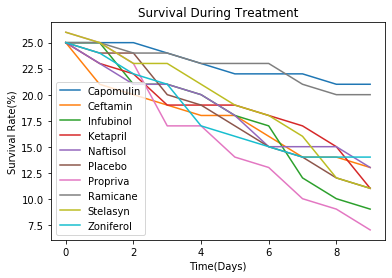

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(len(mouse_count_pivot))
Capomulin = mouse_count_pivot["Capomulin"]
Ceftamin = mouse_count_pivot["Ceftamin"]
Infubinol = mouse_count_pivot["Infubinol"] 
Ketapril = mouse_count_pivot["Ketapril"]
Naftisol = mouse_count_pivot["Naftisol"]
Placebo = mouse_count_pivot["Placebo"]
Propriva = mouse_count_pivot["Propriva"]
Ramicane = mouse_count_pivot["Ramicane"]
Stelasyn = mouse_count_pivot["Stelasyn"]
Zoniferol = mouse_count_pivot["Zoniferol"]

plt.plot(x_axis, Capomulin, label="Capomulin")
plt.plot(x_axis, Ceftamin, label="Ceftamin")
plt.plot(x_axis, Infubinol, label="Infubinol")
plt.plot(x_axis, Ketapril, label="Ketapril")
plt.plot(x_axis, Naftisol, label="Naftisol")
plt.plot(x_axis, Placebo, label="Placebo")
plt.plot(x_axis, Propriva, label="Propriva")
plt.plot(x_axis, Ramicane, label="Ramicane")
plt.plot(x_axis, Stelasyn, label="Stelasyn")
plt.plot(x_axis, Zoniferol, label="Zoniferol")


plt.legend(loc="best", fancybox=True)
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")

plt.show()

# Save the Figure
plt.savefig("Survival_Chart.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
avg_tumor_vol_percentchg = avg_tumor_vol_pivot.pct_change()

# Display the data to confirm
avg_tumor_vol_percentchg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.016309,0.033401,0.045822,0.053093,0.039913,0.047235,0.049977,-0.023448,0.056166,0.041152
10,-0.026698,0.038322,0.049762,0.046278,0.040561,0.048758,0.039209,-0.032152,0.040743,0.039231
15,-0.023674,0.037463,0.038306,0.056829,0.045977,0.039180,0.040035,-0.024379,0.041759,0.042908
20,-0.032046,0.041182,0.037065,0.048110,0.053228,0.058503,0.044636,-0.030286,0.049253,0.047092
25,-0.019078,0.040850,0.047325,0.050219,0.057562,0.057357,0.040441,-0.031413,0.038817,0.042554
30,-0.029299,0.045717,0.046381,0.057482,0.049840,0.040473,0.048505,-0.006957,0.065175,0.041142
35,-0.024568,0.036252,0.041905,0.038974,0.052478,0.043665,0.037010,-0.032327,0.043692,0.041166
40,-0.022710,0.044883,0.039846,0.042557,0.046513,0.042167,0.044662,-0.023441,0.046695,0.047052


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)